# **Task: Build K‑Nearest Neighbors (KNN) Classifier from Scratch**

## **Objective :**
- Implement the KNN classification algorithm in Python without using scikit‑learn’s KNeighborsClassifier.

- Practice data loading, cleaning, feature scaling, and train/test splitting.

- Evaluate your classifier’s performance using accuracy, precision, recall, and a confusion matrix.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

## **1. Data loading**


In [1]:
import kagglehub
import pandas as pd

# Step 1: Download latest version of the dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)

# Step 2: Load the dataset
df = pd.read_csv(f"{path}/data.csv", index_col='id').reset_index(drop=True)
df.head()

ModuleNotFoundError: No module named 'kagglehub'

## **2. Data Preprocessing**

- **Identify missing values**
- **Handle missing data (choose one)**
- **Feature scaling**
- **Train/Test split**: Split into 70% train / 30% test (use random_state=42).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

if 'Unnamed: 32' in df.columns:
    df = df.drop(columns=['Unnamed: 32'])

X = df.drop(columns=['diagnosis']).values
y = (df['diagnosis'] == 'M').astype(int).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## **Implement KNN Class**

In [ ]:
class kNN:
    def __init__(self, k=3, metric='euclidean', p=2):
        self.k = k
        self.metric = metric
        self.p = p

    def euclidean(self, v1, v2):
        return np.linalg.norm(v1 - v2)

    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1 - v2))

    def minkowski(self, v1, v2, p):
        return np.sum(np.abs(v1 - v2) ** p) ** (1 / p)

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def get_neighbors(self, test_row):
        distances = []
        for i, x_train in enumerate(self.X_train):
            if self.metric == 'euclidean':
                d = self.euclidean(test_row, x_train)
            elif self.metric == 'manhattan':
                d = self.manhattan(test_row, x_train)
            else:
                d = self.minkowski(test_row, x_train, self.p)
            distances.append((d, i))
        distances.sort(key=lambda x: x[0])
        idxs = [idx for (_, idx) in distances[: self.k]]
        return idxs

    def predict(self, X):
        preds = []
        for row in X:
            nbrs = self.get_neighbors(row)
            votes = self.y_train[nbrs]
            preds.append(np.bincount(votes).argmax())
        return np.array(preds)


## **Evaluate the model**


Fine the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report

In [ ]:
def evaluate(y_true, y_pred):
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

## **Effect of k on Classification Accuracy**

- For each k from 3 to 29, fit your k‑NN on the training set and record test accuracy.

- Plot k (on the x‑axis) vs. accuracy (on the y‑axis), with markers and clear labels.


=== k-NN Results (k=3) ===
Accuracy:  0.9591
Precision: 0.9516
Recall:    0.9365
Confusion Matrix:
[[105   3]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


=== k-NN Results (k=5) ===
Accuracy:  0.9591
Precision: 0.9516
Recall:    0.9365
Confusion Matrix:
[[105   3]
 [  4  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


=== k-NN Results (k=7) ===
Accuracy:  0.9591
Precisio

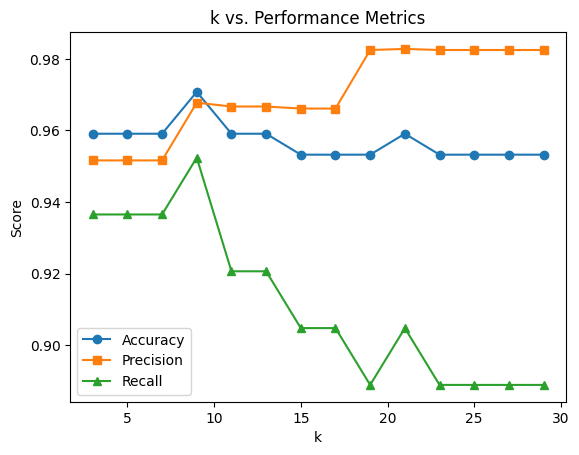

In [ ]:
ks = range(3, 30, 2)
results = {'k': [], 'accuracy': [], 'precision': [], 'recall': []}

for k in ks:
    knn = kNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)

    results['k'].append(k)
    results['accuracy'].append(acc)
    results['precision'].append(prec)
    results['recall'].append(rec)

    print(f"\n=== k-NN Results (k={k}) ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



plt.figure()
plt.plot(results['k'], results['accuracy'], marker='o', label='Accuracy')
plt.plot(results['k'], results['precision'], marker='s', label='Precision')
plt.plot(results['k'], results['recall'], marker='^', label='Recall')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('k vs. Performance Metrics')
plt.legend()
plt.show()
